# APRENDIZAJE AUTOMÁTICO
# Práctica 1: Regresión
### Autor: Yoldi Vigueras, Jaime
### NIP:   779057
### Fecha: 05-02-2025
---



## Configuración

In [1]:
%matplotlib inline
try:
  from google.colab import drive
  print("Trabajando en Colab")
  drive.mount('/content/drive')                # Monta tu google drive
  Path = '/content/drive/MyDrive/Aprendizaje/' # Directorio donde guardas los ficheros
except:
  print("Trabajando en local")
  Path = ''                                    # Directorio donde guardas los ficheros

Trabajando en Colab
Mounted at /content/drive


---
## 0. Visualización de datos

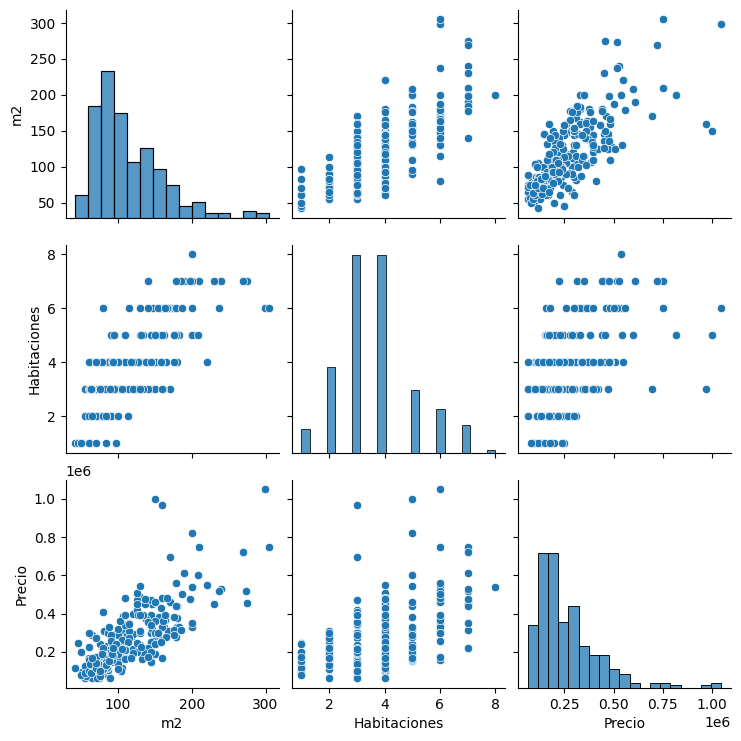

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Leer los ficheros de datos y pasarlos a matrices de numpy
pisos_train = pd.read_csv(Path+'PisosTrain.csv', sep = ";")
x1_train = pisos_train["m2"].to_numpy().reshape(-1, 1)
x2_train = pisos_train["Habitaciones"].to_numpy().reshape(-1, 1)
y_train  = pisos_train["Precio"].to_numpy()

pisos_test  = pd.read_csv(Path+'PisosTest.csv',  sep = ";")
x1_test = pisos_test["m2"].to_numpy().reshape(-1, 1)
x2_test = pisos_test["Habitaciones"].to_numpy().reshape(-1, 1)
y_test  = pisos_test["Precio"].to_numpy()

# Mostrar los datos de entrenamiento
seaborn.pairplot(pisos_train)
plt.show()

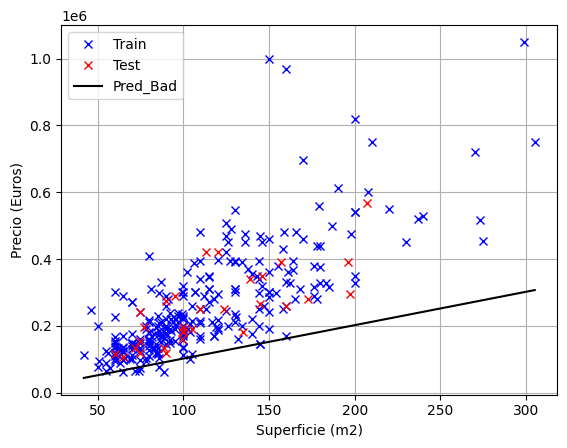

In [ ]:
# Ejemplo de dibujo de un atributo y una prediccion inventada
x1_grid = np.linspace(np.min(x1_train), np.max(x1_train), 100).reshape(-1, 1)
y_grid_pred = x1_grid *1000 + 2000  # Prediccion inventada

plt.figure()
plt.plot(x1_train, y_train, 'bx', label='Train')
plt.plot(x1_test, y_test,  'rx', label='Test')
plt.plot(x1_grid, y_grid_pred, 'k-', label='Pred_Bad')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (Euros)')
plt.legend()
plt.grid()
plt.show()


Aquí explico las conclusiones que he sacado analizando los datos.

---
## 1. Métricas

Las metricas que se van a utilizar para evaluar los modelos van a ser el error cuadratico medio (MSE) y el coeficiente de terminacion R² (R-square).  Ambas medidas son utilizadas para la evaluacion de modelos y conocer como se comportan los predictores con los datos.Estas tienen una funcion de sklearn que permite calcularlas facilmente.

In [5]:
from sklearn.metrics import mean_squared_error,r2_score

def obtenerMetricas(predictor, x_test, y_test):
  y_pred = predictor.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

----
## 2. Regresión Monovariable

Si hace falta, explico cómo lo he resuelto y por qué, y **cito todas las fuentes utilizadas**.

Error Cuadrático Medio (MSE): 6500962224.887705
R-cuadrado (R²): 0.4608909883530128
Ecuación de la regresión: y = 2608.21x + -34313.39


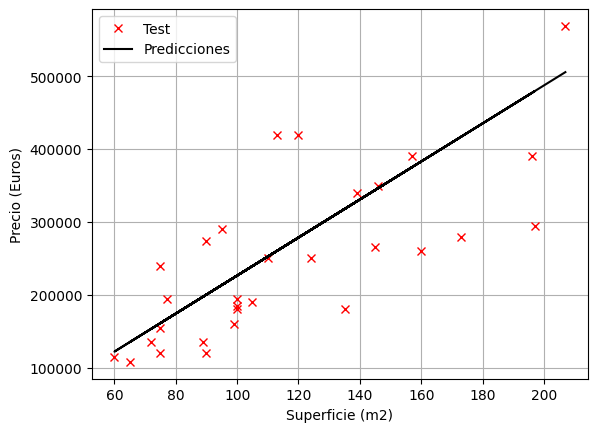

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x1_train, y_train)

# Calculo las metricas

mse, r2 = obtenerMetricas(modelo, x1_test, y_test)  # Asumiendo que ya tienes la función obtenerMetricas

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R-cuadrado (R²): {r2}")
print(f"Raiz del MSE :  {np.sqrt(mse)}")

# muestro la ecuacion que se usa para predecir
m = modelo.coef_[0]  # Pendiente
b = modelo.intercept_  # Intersección

print(f"Ecuación de la regresión: y = {m:.2f}x + {b:.2f}")

# Visualizar los resultados
y_pred = modelo.predict(x1_test)
plt.figure()
plt.plot(x1_test, y_test, 'rx', label='Test')
plt.plot(x1_test, y_pred, 'k-', label='Predicciones')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (Euros)')
plt.legend()
plt.grid()
plt.show()



Aquí explico y analizo los resultados obtenidos.

----

## 3. Regresión Multivariable Simple


----

## 4. Regresión Multivariable Descenso de Gradiente

----

## 5. Regresión Robusta Huber

----

## 6. Redes neuronales